# Chatbot Test Notebook

Analysis of a chatbot's performance using various metrics.

In [15]:
import textwrap
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [16]:

VECTORDB_SUFFIX = "_semantic"   # "_techrules"  "_semantic" 

In [17]:
# retrieve dataframe from pickle file
with open(f"../results/test_results_df{VECTORDB_SUFFIX}.pkl", "rb") as f:
    test_results_df = pickle.load(f)
test_results_df.head()

,question,situation,query_time,response_eval_time,llm_response,correctness_score,feedback,target
0,A breaststroke swimmer moves their hands in a ...,9,1.439963,6.136053,"No, the swimmer should not be disqualified. Ac...",False,The output claims that a sculling or flipper m...,"No, the swimmer should not be disqualified. Th..."
1,"In a 9-10 100 yard breaststroke event, a swimm...",10,1.617400,4.440495,The swimmer should be disqualified. According ...,True,The provided output asserts that the swimmer s...,The swimmer left the wall on the back and then...
2,"In a 9-10 100 yard breaststroke event, a swimm...",11,0.811172,3.996282,I don't have that rule in my current documenta...,False,The output provided by the model is factually ...,"No call should be made. The rule states, “It i..."
3,"In a senior 100 yard breaststroke event, the t...",12,1.736636,4.099226,"Yes, the swimmer should be disqualified. Accor...",False,The output claims that the swimmer should be d...,The swimmer should not be disqualified. The ru...
4,When a swimmer left the wall at the first turn...,13,1.836322,3.179850,"Yes, the swimmer should have been disqualified...",True,The examined output claims that the swimmer wa...,"Yes. The rule states, “After the start and aft..."


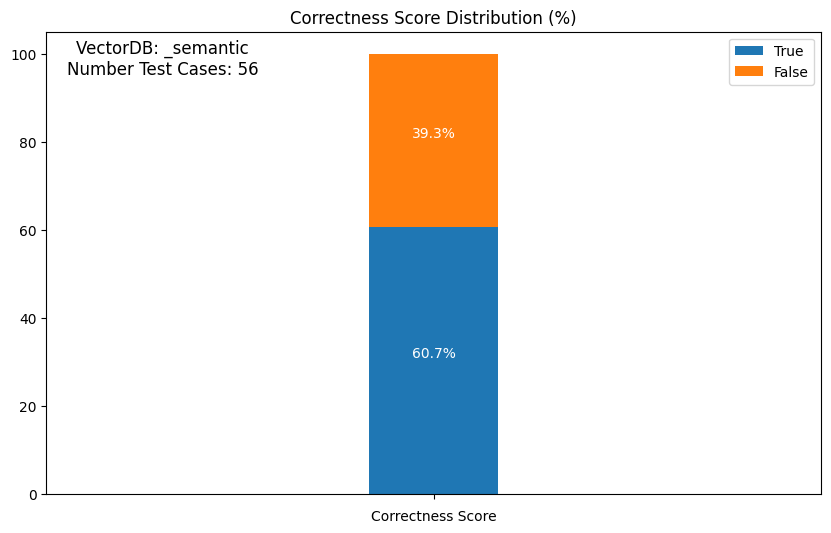

In [18]:

fig, ax = plt.subplots(figsize=(10, 6))
# Set the figure size
# Calculate value counts and normalize to percentages
value_counts = test_results_df['correctness_score'].value_counts(normalize=True).mul(100)


# Create a stacked bar plot
df = pd.DataFrame(value_counts).T
df.columns = value_counts.index.astype(str).to_list()
df.rename(index={"proportion": 'correctness_score'}, inplace=True)
df = df[["True", "False"]]
df.plot.bar(stacked=True, ax=ax, width=0.1)
plt.title('Correctness Score Distribution (%)')
ax.set_xticklabels([], rotation=0)
plt.xlabel('Correctness Score')


# label the bars with percentage values
value_patches = zip(value_counts, ax.patches)
for value, patch in value_patches:
    height = patch.get_height()
    ax.annotate(f'{value:.1f}%', 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + value / 2), 
                ha='center', va='bottom', fontsize=10, color="white")
    
# annotate chart with number of test cases
total_test_cases = len(test_results_df)
ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.15, 0.9), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


# Create stacked bar plot

plt.show()

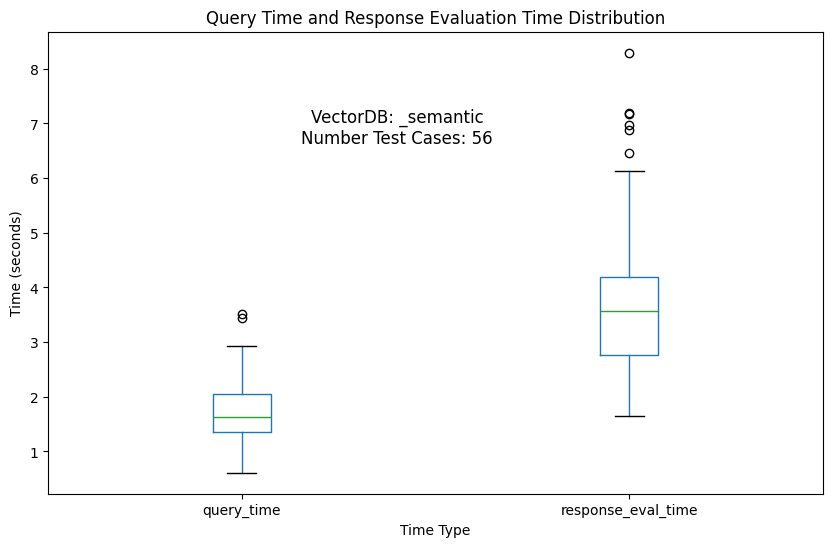

In [19]:
# boxplot for query_time and response_eval_time
fig, ax = plt.subplots(figsize=(10, 6)) 
# Set the figure size
# Create boxplot
test_results_df[["query_time", "response_eval_time"]].boxplot(ax=ax, grid=False)
plt.title('Query Time and Response Evaluation Time Distribution')
plt.ylabel('Time (seconds)')
plt.xlabel('Time Type') 

ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.45, 0.75), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


plt.show()

In [20]:
test_results_df[["query_time", "response_eval_time"]].describe()

,query_time,response_eval_time
count,56.000000,56.000000
mean,1.723987,3.833022
std,0.579601,1.507546
min,0.609748,1.638209
25%,1.354191,2.769286
50%,1.623396,3.574065
75%,2.043911,4.184543
max,3.503268,8.294558


In [21]:
for idx,row in test_results_df.iterrows():
    print(f"\n>>>QUERY {row['situation']} {textwrap.fill(row['question'], width=90)}")
    print(f">>>ANSWER {textwrap.fill(row['llm_response'], width=90)}")
    print(f">>>TARGET {textwrap.fill(row['target'], width=90)}")
    print(f">>>CORRECTNESS {row['correctness_score']} ")
    print(f">>>FEEDBACK {textwrap.fill(row['feedback'], width=90)}")


>>>QUERY 9 A breaststroke swimmer moves their hands in a sculling or flipper movement at the end of
the first arm stroke, both after the start and after the turn. Should they be
disqualified?
>>>ANSWER No, the swimmer should not be disqualified. According to rule 101.2.2, after the start and
after each turn, the swimmer may take one arm stroke completely back to the legs. The
rules do not explicitly prohibit a sculling or flipper movement at the end of the first
arm stroke, so it is allowed.
>>>TARGET No, the swimmer should not be disqualified. This is legal provided, "All movements of the
arms shall be simultaneous without alternating movement." A sculling motion of the hands,
only as a part of the arm stroke, is not considered the beginning of a new stroke.
>>>CORRECTNESS False 
>>>FEEDBACK The output claims that a sculling or flipper movement at the end of the first arm stroke
is allowed under rule 101.2.2, stating that the swimmer may take one arm stroke completely
back to the leg